## The Engineering WOrld - A Place For Learning And Exploring

## Cleaning Data in Python statistics essential training

Standard imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
billboard = pd.read_csv('billboard.csv', encoding = "ISO-8859-1")

In [4]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

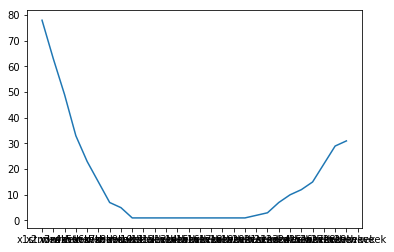

In [9]:
pp.plot(billboard.loc[0, 'x1st.week':'x76th.week'])

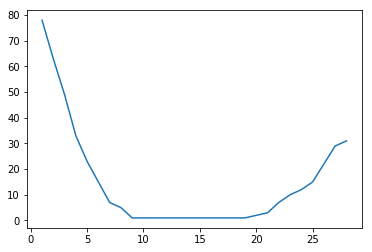

In [10]:
pp.plot(range(1, 77),billboard.loc[0, 'x1st.week':'x76th.week'])

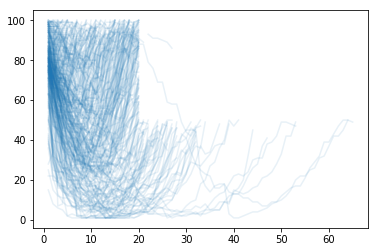

In [11]:
for index, row in billboard.iterrows():
    pp.plot(range(1, 77), row['x1st.week': 'x76th.week'], color='C0', alpha = 0.1)

In [13]:
bshort = billboard[['artist.inverted', 'track', 'time', 'date.entered', 'x1st.week', 'x2nd.week', 'x3rd.week']]

In [14]:
bshort.head()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [15]:
bshort.columns = ['artist', 'track', 'time', 'data.entered', 'wk1', 'wk2', 'wk3']
bshort.head()

,artist,track,time,data.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [24]:
bmelt = bshort.melt(['artist','track','time','date.entered'],['wk1','wk2','wk3'],'week','rank')
bmelt.head()

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,NaN,wk1,78.0
1,Santana,"Maria, Maria",4:18,NaN,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,NaN,wk1,71.0
3,Madonna,Music,3:45,NaN,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,NaN,wk1,57.0


In [17]:
bmelt.query('track == "Liar"')

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,NaN,wk1,52.0
383,Profyle,Liar,3:57,NaN,wk2,32.0
700,Profyle,Liar,3:57,NaN,wk3,25.0


In [20]:
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2]))

In [21]:
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,NaN,1,78.0
1,Santana,"Maria, Maria",4:18,NaN,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,NaN,1,71.0
3,Madonna,Music,3:45,NaN,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,NaN,1,57.0


In [22]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

In [23]:
bmelt['date.entered'][0] + pd.Timedelta('7 days')

NaT